# 2 필요한 라이브러리 코드

In [552]:
# 데이터 분석을 위한 pandas, 수치 계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline 구버전 주피터노트북 시각화 설정 안될 때

# 3 데이터셋 로드

In [553]:
df=pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 4.1 수치형 변수를 범주형 변수로 만들기 

In [554]:
df["Pregnancies_high"]=df["Pregnancies"]> 6
df[["Pregnancies_high", 'Pregnancies']]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False
766,1,126,60,0,0,30.1,0.349,47,1,False


In [555]:
# One-Hot-Encoding
# 수치 -> 범주 -> 수치
df["Age_low"]=df["Age"] <30
df["Age_middle"]=(df["Age"] >=30) & (df["Age"] <=60)
df["Age_high"]=df["Age"]>60

df[["Age", "Age_low", "Age_middle","Age_high"]]

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False
...,...,...,...,...
763,63,False,False,True
764,27,True,False,False
765,30,False,True,False
766,47,False,True,False


<AxesSubplot:xlabel='Age_high', ylabel='count'>

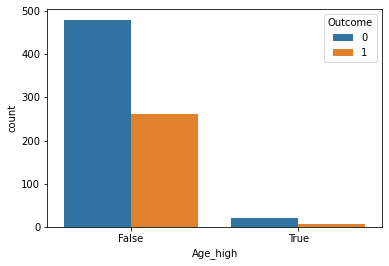

In [556]:
sns.countplot(data=df, x='Age_high', hue="Outcome")

### 4.2 결측치 나누기

In [557]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [558]:
df["Insulin_nan"]=df['Insulin'].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]]

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0
...,...,...
763,180,180.0
764,0,NaN
765,112,112.0
766,0,NaN


In [559]:
df["Insulin_nan"].isnull().sum()

374

In [560]:
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [561]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean","median"])

C:\Users\wlsgh\AppData\Local\Temp/ipykernel_30192/3214081025.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean","median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [562]:
# 결측치 채우기
df.loc[(df["Outcome"]== 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"]= 169.5
df.loc[(df["Outcome"]== 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"]= 102.5
df["Insulin_nan"]

0      169.5
1      102.5
2      169.5
3       94.0
4      168.0
       ...  
763    180.0
764    102.5
765    112.0
766    169.5
767    102.5
Name: Insulin_nan, Length: 768, dtype: float64

###  4.3 정규분포 만들기

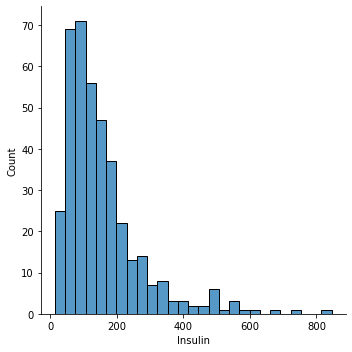

In [563]:
sns.displot(df.loc[df["Insulin"] > 0, 'Insulin'])

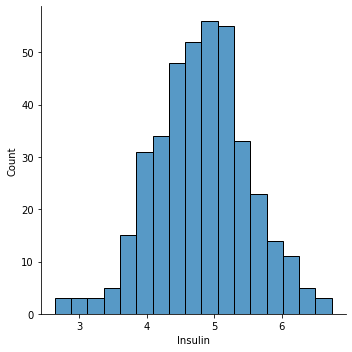

In [564]:
sns.displot(np.log(df.loc[df["Insulin"] > 0, 'Insulin']))

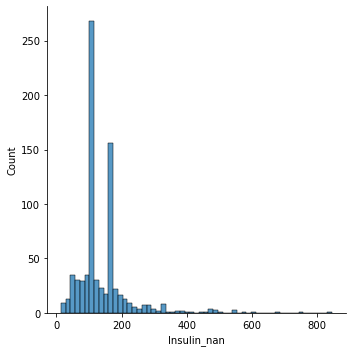

In [565]:
sns.displot(df["Insulin_nan"])

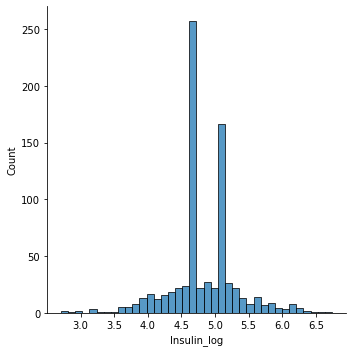

In [566]:
df["Insulin_log"]=np.log(df["Insulin_nan"]+1)
sns.displot(df["Insulin_log"])

### 4.4 파생변수 만들기

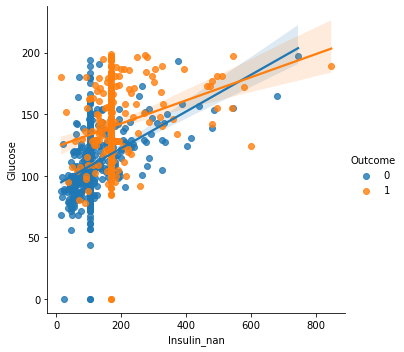

In [567]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [568]:
df["low_glu_insulin"]=(df["Glucose"]<100) &(df["Insulin_nan"]<=102.5)
df["low_glu_insulin"].head()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


In [569]:
pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


### 4.5 이상치(outlier) 나누기

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_nan'>

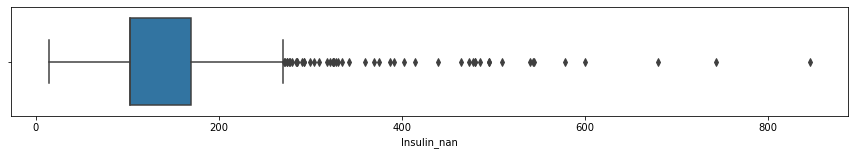

In [570]:
plt.figure(figsize=(15,2))
sns.boxplot(df["Insulin_nan"])

In [571]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [572]:
IQR3 =df["Insulin_nan"].quantile(0.75)
IQR1 =df["Insulin_nan"].quantile(0.25)
IQR=IQR3- IQR1
IQR

67.0

In [573]:
OUT=IQR3 + (IQR *1.5)
OUT

270.0

In [574]:
df[df["Insulin_nan"]> OUT].shape

(51, 16)

In [575]:
df[df["Insulin_nan"]> 600].shape

(3, 16)

### 4.6 scaling

In [576]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


In [577]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[["DiabetesPedigreeFunction","Glucose"]])
scale=scaler.transform(df[["DiabetesPedigreeFunction","Glucose"]])
scale

array([[ 0.46849198,  0.84832379],
       [-0.36506078, -1.12339636],
       [ 0.60439732,  1.94372388],
       ...,
       [-0.68519336,  0.00330087],
       [-0.37110101,  0.1597866 ],
       [-0.47378505, -0.8730192 ]])

In [578]:
# df[["DiabetesPedigreeFunction","Glucose"]]= scale
# df[["DiabetesPedigreeFunction","Glucose"]].head()

array([[<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

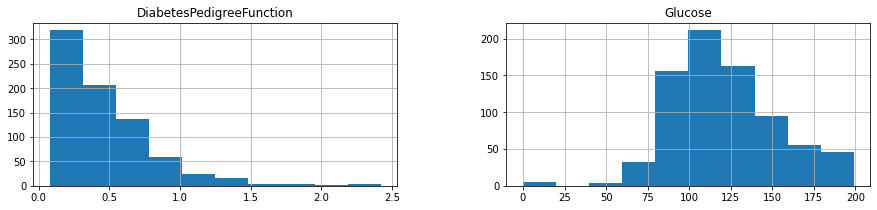

In [579]:
df[["DiabetesPedigreeFunction","Glucose"]].hist(figsize=(15,3))

## CSV 파일로 저장하기

In [606]:
df.to_csv("../data/diabetes_feature.csv", index=False)
pd.read_csv("../data/diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 4 학습, 예측 데이터셋 나누기

In [580]:
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담습니다.
split_count= int(df.shape[0] * 0.8)
split_count

614

In [581]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train=df[:split_count].copy()
train.shape

(614, 16)

In [582]:
train[train["Insulin_nan"] < 600].shape


(610, 16)

In [583]:
train=train[train["Insulin_nan"] < 600]


In [584]:
test=df[split_count:].copy()
test.shape

(154, 16)

In [585]:
df["low_glu_insulin"]=(df["Glucose"]<100) &(df["Insulin_nan"]<=102.5)
df["low_glu_insulin"].head()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


# 5 학습, 예측에 사용할 컬럼

In [586]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names=train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")

feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

# 6 정답값이자 예측해야 될 값

In [587]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name="Outcome"
label_name

'Outcome'

# 7 학습, 예측 데이터셋 만들기

In [588]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train=train[feature_names]
X_train.shape
X_train.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [589]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [590]:
# 예측에 사용할 데이터셋을 만듭니다. 예) 실전 시험 문제
X_test=test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [591]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test=test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 8 머신러닝 알고리즘 가져오기

In [592]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()


In [593]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# 9 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

# 10 예측
* 실전 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.


In [594]:
y_predict=model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

# 11 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

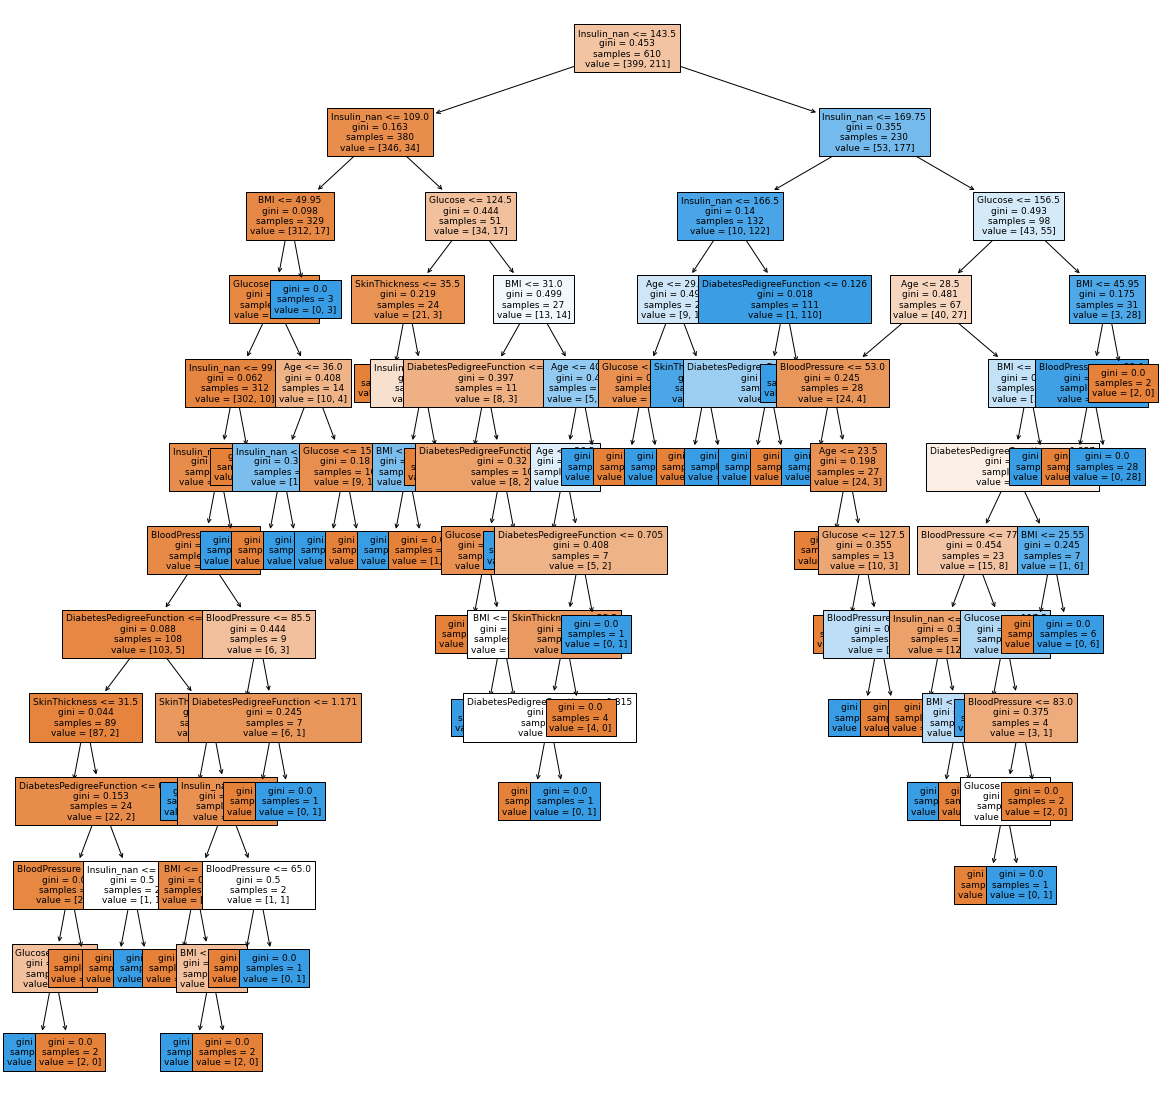

In [595]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree=plot_tree(model, feature_names=feature_names,
               filled=True, fontsize=9)

In [596]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.09934043, 0.04879929, 0.02196124, 0.08551451, 0.04560649,
       0.07366808, 0.        , 0.62510997, 0.        ])

<AxesSubplot:>

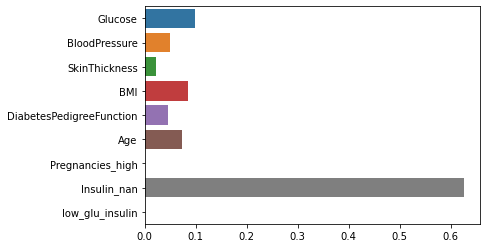

In [597]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_, y=feature_names)

# 12 정확도(Accuracy) 측정하기

In [598]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# 인슐린 결측치를 평균으로 대체
diff_count=abs(y_test - y_predict).sum()
diff_count

19

In [599]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
(len(y_test)-diff_count) / len(y_test) * 100

87.66233766233766

In [600]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
# 85 인슐린 결측치를 평균으로 대체
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

87.66233766233766

In [601]:
# model의 score로 점수를 계산합니다.

model.score(X_test, y_test) * 100

87.66233766233766